<a href="https://colab.research.google.com/github/663469751/SIADS_Milestone1/blob/main/home_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Home Price Analysis - Group 16-steveso-shuyilin-nkanungo

### Team Member:
 - Steven Song (steveso)
 - Shuyi Lin (shuyilin)
 - Neil Kanungo (nkanungo)

## 1. Motivation

The US Housing Market has seen dramatic price swings in the past 36 months. These are generally understood to be tightly related to Federal Interest Rates. However, what other factors may affect these home prices? In our project, we seek to understand the main contributors to home prices in US Metro Areas, depending on Federal Interest Rates, Inflation, Population Migrations, and Geographical Region.


These are the key questions we want to understand:
 - What are the strongest contributors to home price changes?
 - How are inflation and interest rates related?
 - What are the geographical variances between home price changes?
 - How has net migration affected home buying demand?
 - Are certain regional home markets more or less influenced by these economic factors?

Our data spans from January 2001 to the present and utilizes several different data sources that will be unified, analyzed, and visualized for a cohesive report.


The following section is used to import the libraries required in this notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## 2. Data Sources

In this analysis, we will use five different data sources to collect the information we need. All these data sources are publicly available and can be downloaded at the links provided below.

### 2.1 Home Value Dataset

The Zillow Research datasets are a collection of datasets that track various aspects of the housing market, including home prices, rents, and mortgage rates.
In this analysis, we will focus on one dataset from this database that is called:
<b>Median Sale Price (Raw, AllHomes, Weekly).</b>
<br>
This dataset contains the median price at which home across Metropolitans in us were sold.
 - Estimated size: 1109 kb
 - Location: The datasets can be downloaded from the Zillow Research website: https://www.zillow.com/research/data/
 - Format: The datasets are in CSV format.

Run the following code block to load the dataset and check its preview.

In [ ]:
# Load dataset from local files
#housing_df = pd.read_csv('assets/Metro_median_sale_price_uc_sfrcondo_week.csv')

# Load dataset from github
housing_url = 'https://raw.githubusercontent.com/songxincheng124/SIADS_Milestone1/main/Metro_median_sale_price_uc_sfrcondo_week.csv'
housing_df = pd.read_csv(housing_url)
housing_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2023-06-03,2023-06-10,2023-06-17,2023-06-24,2023-07-01,2023-07-08,2023-07-15,2023-07-22,2023-07-29,2023-08-05
0,102001,0,United States,country,NaN,184000.0,180000.0,180000.0,176500.0,182000.0,...,370000.0,360000.0,370000.0,365000.0,372000.0,364250.0,365000.0,360000.0,360000.0,365050.0
1,394913,1,"New York, NY",msa,NY,392000.0,411500.0,409500.0,409000.0,390000.0,...,580000.0,550000.0,580000.0,580500.0,605000.0,595000.0,610000.0,575000.0,600000.0,610000.0
2,753899,2,"Los Angeles, CA",msa,CA,475000.0,500500.0,519500.0,520750.0,482000.0,...,897750.0,875000.0,907500.0,874500.0,917500.0,900000.0,894250.0,875000.0,900000.0,910000.0
3,394463,3,"Chicago, IL",msa,IL,234000.0,235000.0,229000.0,216750.0,230000.0,...,337000.0,320000.0,332000.0,320750.0,326500.0,325000.0,325000.0,315000.0,310000.0,325000.0
4,394514,4,"Dallas, TX",msa,TX,137525.0,125000.0,140080.0,136000.0,138000.0,...,405000.0,415000.0,394000.0,404000.0,405000.0,408000.0,405500.0,396250.0,405000.0,407500.0


### 2.2 Federal Interest Rate dataset
The FRED FFR rate dataset is a monthly time series of the Federal Funds Effective Rate (DFF), which is the interest rate that depository institutions charge each other for overnight loans of funds.
 - Estimated size: The dataset is about 28KB in size and contains over 25,000 records.
 - Location: The dataset can be downloaded from the FRED website: https://fred.stlouisfed.org/series/DFF
 - Format: The dataset is in CSV format.

Run the following code block to load the dataset and check its preview.

In [ ]:
# Load dataset from local files
#interest_rate_df = pd.read_csv('assets/FEDFUNDS.csv')

# Load dataset from github
interest_rate_url = 'https://raw.githubusercontent.com/songxincheng124/SIADS_Milestone1/main/FEDFUNDS.csv'
interest_rate_df = pd.read_csv(interest_rate_url)

### 2.3 Inflation Dataset

The FRED CPI dataset is a monthly time series of the Consumer Price Index (CPI), which is a measure of the change in prices paid by urban consumers for a basket of consumer goods and services.
 - Estimated size: The dataset is about 16 KB in size and contains over 900 records.
 - Location: The dataset can be downloaded from the FRED website: https://fred.stlouisfed.org/series/CPIAUCSL
 - Format: The dataset is in CSV format.

In [ ]:
# Load dataset from local files
#inflation_df = pd.read_csv('assets/CPIAUCSL.csv')

inflation_url = 'https://raw.githubusercontent.com/songxincheng124/SIADS_Milestone1/main/CPIAUCSL.csv'
inflation_df = pd.read_csv(inflation_url)

### 2.4 Population Dataset

CBSA-EST is the dataset originating from the United States Census Bureau. It contains the Metropolitan and Micropolitan Statistical Areas Population Totals number between 2000  and 2022.

 - Estimated size: The dataset is about 261 KB in size and contains the population data for about 2800 cities/counties. .
 - Location: The dataset can be downloaded from the census.gov website: https://www.census.gov/data/tables/time-series/demo/popest/2020s-total-metro-and-micro-statistical-areas.html
 - Format: The dataset is in CSV format.


In [ ]:
# Load dataset from local files
#population_2000_2010_df = pd.read_csv('assets/cbsa-report-chapter-2-data.csv')

population_2000_2010_url = 'https://raw.githubusercontent.com/songxincheng124/SIADS_Milestone1/main/cbsa-report-chapter-2-data.csv'
population_2000_2010_df = pd.read_csv(population_2000_2010_url)

In [ ]:
# Load dataset from local files
#population_2010_2020_df = pd.read_csv('assets/cbsa-est2020-alldata.csv', encoding='latin-1')

population_2010_2020_url = 'https://raw.githubusercontent.com/songxincheng124/SIADS_Milestone1/main/cbsa-est2020-alldata.csv'
population_2010_2020_df = pd.read_csv(population_2010_2020_url, encoding='latin-1')

In [ ]:
# Load dataset from local files
#population_2020_2023 = pd.read_csv('assets/cbsa-est2022.csv', encoding='latin-1')

population_2020_2023_url = 'https://raw.githubusercontent.com/songxincheng124/SIADS_Milestone1/main/cbsa-est2022.csv'
population_2020_2023_df = pd.read_csv(population_2020_2023_url, encoding='latin-1')


### 2.5 Latitude and Longitude Dataset

SimpleMaps provides a dataset containing latitude and longitude coordinates for various U.S. cities. This dataset helps map cities to their geographical coordinates, facilitating geospatial visualizations.

*   Estimated Size: The dataset size is 4995 KB.
*   Location: The dataset can be accessed and downloaded from the SimpleMaps *   website: https://simplemaps.com/data/us-cities
*   Format: The dataset is in CSV format.



In [ ]:
# Load dataset from local files

lat_long_df_url = 'https://raw.githubusercontent.com/songxincheng124/SIADS_Milestone1/main/uscities.csv'
lat_long_df = pd.read_csv(lat_long_df_url)

## 3. Data Cleaning and Manipulation

 In this section, we will perform data cleaning to address the missing value in the dataset, and we will reformate the dataset and merge some of them to create new Dataframes so that they can be easily used in the Analysis and visualization step.

### 3.1 Remove unnecessary columns and rows

We can remove the columns and rows that will not be used in this project. For example, we will only analyze the data between 2008 and to 2023. We can discard the data outside of our interests.

In [ ]:
# Block to remove unnecessary columns and rows in the home price dataset, then pivot by date and aggregate (sum) by year month
# Filter to MSA's only
housing_df = housing_df[housing_df['RegionType']=='msa']

# Get only city name
housing_df['RegionName'] = housing_df['RegionName'].str.split(', ').str[0]

# Remove unnecessary columns
housing_df = housing_df.drop(columns=['RegionID','SizeRank','RegionType'])

# Unpivot data to tall format
housing_df = pd.melt(housing_df, id_vars=['RegionName', 'StateName'], var_name='Date', value_name='Median Sale Price')
housing_df['Date'] = pd.to_datetime(housing_df['Date']).dt.year

# Remove nulls and aggregate by location and date
housing_df = housing_df.dropna()
housing_df = housing_df.groupby(['Date','RegionName','StateName'])['Median Sale Price'].mean().reset_index()

# Rename columns
colnames = ["Year","City","State","MedianSalePrice"]
housing_df.columns = colnames

# Print results
housing_df.head()

,Year,City,State,MedianSalePrice
0,2008,Akron,OH,121982.791667
1,2008,Albuquerque,NM,183058.333333
2,2008,Allentown,PA,186049.000000
3,2008,Asheville,NC,192148.187500
4,2008,Atlanta,GA,166735.666667


In [ ]:
# Block to remove unnecessary rows in the interest rate dataset; convert date to datetime
# Convert 'DATE' column to datetime, then filter to years 2008+
interest_rate_df['DATE'] = pd.to_datetime(interest_rate_df['DATE']).dt.year
interest_rate_df = interest_rate_df[interest_rate_df['DATE'] >= 2008]

# Aggregate by year
interest_rate_df = interest_rate_df.groupby(['DATE'])['FEDFUNDS'].mean().reset_index()

# Rename columns
colnames = ["Year","FedInterestRate"]
interest_rate_df.columns = colnames

# Print results
interest_rate_df.tail()

,Year,FedInterestRate
11,2019,2.158333
12,2020,0.375833
13,2021,0.080000
14,2022,1.683333
15,2023,4.871250


In [ ]:
# Convert 'DATE' column to datetime, then filter to years 2008+
inflation_df['DATE'] = pd.to_datetime(inflation_df['DATE']).dt.year
inflation_df = inflation_df[inflation_df['DATE'] >= 2008]

# Aggregate by year
inflation_df = inflation_df.groupby(['DATE'])['CPIAUCSL'].mean().reset_index()

# Rename columns
colnames = ["Year","ConsumerPriceIndex"]
inflation_df.columns = colnames

# Print results
inflation_df.tail()

,Year,ConsumerPriceIndex
11,2019,255.651667
12,2020,258.850583
13,2021,270.971417
14,2022,292.612500
15,2023,303.082750


In [ ]:
# Filter to just MSA's
population_2000_2010_df = population_2000_2010_df[population_2000_2010_df['Legal/statistical area description']=="Metropolitan Statistical Area"]

# Create friendly column names
population_2000_2010_df.columns = [c.replace("\n", "_") for c in population_2000_2010_df.columns]
population_2000_2010_df.columns = [c.replace(" Census", "") for c in population_2000_2010_df.columns]
population_2000_2010_df.columns = [c.replace("Census ", "") for c in population_2000_2010_df.columns]

# Create empty populations for years 2001-2009
population_2000_2010_df['2001'] = np.nan
population_2000_2010_df['2002'] = np.nan
population_2000_2010_df['2003'] = np.nan
population_2000_2010_df['2004'] = np.nan
population_2000_2010_df['2005'] = np.nan
population_2000_2010_df['2006'] = np.nan
population_2000_2010_df['2007'] = np.nan
population_2000_2010_df['2008'] = np.nan
population_2000_2010_df['2009'] = np.nan

# Remove unnecessary columns
population_2000_2010_df = population_2000_2010_df.drop(columns=['CBSA_Code','Number','Legal/statistical area description','Percent'])

# Clean up 'Geographic area' column
population_2000_2010_df['State'] = population_2000_2010_df['Geographic area'].str[-2:]
population_2000_2010_df['Geographic area'] = population_2000_2010_df['Geographic area'].str.split(', ').str[0]
population_2000_2010_df['Geographic area'] = population_2000_2010_df['Geographic area'].str.split('-').str.get(0)

# Unpivot data to tall format
population_2000_2010_df = pd.melt(population_2000_2010_df, id_vars=['Geographic area', 'State'], var_name='Year', value_name='Population')

# Interpolate Population
population_2000_2010_df['Population'] = population_2000_2010_df['Population'].str.replace(',', '').astype(float)
population_2000_2010_df = population_2000_2010_df.sort_values(by='Year')
population_2000_2010_df['Population'] = population_2000_2010_df.groupby(['Geographic area', 'State'])['Population'].transform(lambda x: x.interpolate())

# Filter out rows with dates before outside 2008 and 2009
population_2000_2010_df = population_2000_2010_df[population_2000_2010_df['Year'] >= '2008']
population_2000_2010_df = population_2000_2010_df[population_2000_2010_df['Year'] < '2010']

# Add Source column
population_2000_2010_df['Source'] = "2000_2010"

# Rename columns
colnames = ["City","State","Year","Population", "Source"]
population_2000_2010_df.columns = colnames

# Print results
population_2000_2010_df.head()

,City,State,Year,Population,Source
3408,Flint,MI,2008,427860.2,2000_2010
3409,Florence,SC,2008,203083.8,2000_2010
3410,Florence,AL,2008,146299.6,2000_2010
3411,Fond du Lac,WI,2008,100765.6,2000_2010
3412,Fort Collins,CO,2008,290002.8,2000_2010


In [ ]:
# Temporarily create shorter df name
df = population_2010_2020_df

# Filter to MSA's only
df = df[df['LSAD']=='Metropolitan Statistical Area']

# Remove unnecessary columns
df = df.drop(columns=['CBSA','MDIV','STCOU','LSAD'])

# Clean up geo names
df['State'] = df['NAME'].str[-2:]
df['NAME'] = df['NAME'].str.split(', ').str[0]
df['NAME'] = df['NAME'].str.split('-').str.get(0)

# Unpivot data to tall format
df = pd.melt(df, id_vars=['NAME', 'State'], var_name='Year', value_name='Population')
df['Population'] = df['Population'].astype(float)

# Filter to yearly estimate rows and clean up Year column
df = df[df['Year'].str.contains('POPESTIMATE')]
df['Year'] = df['Year'].str[-4:]

# Filter out 2020 data (included in next dataset)
df = df[df['Year'] < '2020']

# Add Source column
df['Source'] = "2010_2020"

# Rename columns
colnames = ["City","State","Year","Population","Source"]
df.columns = colnames

# Print output
population_2010_2020_df = df
population_2010_2020_df.head()

,City,State,Year,Population,Source
768,Abilene,TX,2010,165590.0,2010_2020
769,Akron,OH,2010,703056.0,2010_2020
770,Albany,GA,2010,154155.0,2010_2020
771,Albany,OR,2010,116887.0,2010_2020
772,Albany,NY,2010,871101.0,2010_2020


In [ ]:
# Temporarily create shorter df name
df = population_2020_2023_df

# Filter to MSA's only
df = df[df['LSAD']=='Metropolitan Statistical Area']

# Remove unnecessary columns
df = df.drop(columns=['CBSA','MDIV','STCOU','LSAD'])

# Clean up geo names
df['State'] = df['NAME'].str[-2:]
df['NAME'] = df['NAME'].str.split(', ').str[0]
df['NAME'] = df['NAME'].str.split('-').str.get(0)

# Unpivot data to tall format
df = pd.melt(df, id_vars=['NAME', 'State'], var_name='Year', value_name='Population')
df['Population'] = df['Population'].astype(float)

# Filter to yearly estimate rows and clean up Year column
df = df[df['Year'].str.contains('POPESTIMATE')]
df['Year'] = df['Year'].str[-4:]

# Add Source column
df['Source'] = "2020_2023"

# Rename columns
colnames = ["City","State","Year","Population","Source"]
df.columns = colnames

# Print output
population_2020_2023_df = df
population_2020_2023_df.head()

,City,State,Year,Population,Source
384,Abilene,TX,2020,176866.0,2020_2023
385,Akron,OH,2020,701625.0,2020_2023
386,Albany,GA,2020,148244.0,2020_2023
387,Albany,OR,2020,128978.0,2020_2023
388,Albany,NY,2020,899748.0,2020_2023


In [ ]:
# Stack together population datasets
dataframes = [population_2000_2010_df, population_2010_2020_df, population_2020_2023_df]

# Use pd.concat() to stack them together
population_df = pd.concat(dataframes, ignore_index=True)

# Sort for readability
population_df = population_df.sort_values(by=['City', 'State','Year'])

# Print output
population_df.head()

,City,State,Year,Population,Source
112,Abilene,TX,2008,164250.6,2000_2010
480,Abilene,TX,2009,164751.3,2000_2010
732,Abilene,TX,2010,165590.0,2010_2020
1116,Abilene,TX,2011,166651.0,2010_2020
1500,Abilene,TX,2012,167483.0,2010_2020


In [ ]:
# Drop 'Source' column (only used for traceability/troubleshooting)
population_df = population_df.drop(columns=['Source'])

# Print output
population_df.head()

,City,State,Year,Population
112,Abilene,TX,2008,164250.6
480,Abilene,TX,2009,164751.3
732,Abilene,TX,2010,165590.0
1116,Abilene,TX,2011,166651.0
1500,Abilene,TX,2012,167483.0


In [ ]:
# Join population, inflation, interest, and housing datasets by date and City MSA

# Align year datatypes
population_df['Year'] = population_df['Year'].astype(int)
housing_df['Year'] = housing_df['Year'].astype(int)
inflation_df['Year'] = inflation_df['Year'].astype(int)
interest_rate_df['Year'] = interest_rate_df['Year'].astype(int)


# Perform a left join on the DataFrames one by one
merged_df = population_df
merged_df = merged_df.merge(housing_df, on=['City', 'State', 'Year'], how='left')
merged_df = merged_df.merge(inflation_df, on=['Year'], how='left')
merged_df = merged_df.merge(interest_rate_df, on=['Year'], how='left')

# Drop cities with missing home sale data
merged_df = merged_df.dropna()


# Print results
df = merged_df
df = df.reset_index()
df = df.drop(columns='index')
df.head()


,City,State,Year,Population,MedianSalePrice,ConsumerPriceIndex,FedInterestRate
0,Akron,OH,2008,701552.0,121982.791667,215.254250,1.927500
1,Akron,OH,2009,702376.0,115054.326923,214.564667,0.160000
2,Akron,OH,2010,703056.0,122944.882353,218.076167,0.175000
3,Akron,OH,2011,703262.0,123724.905660,224.923000,0.101667
4,Akron,OH,2012,702224.0,122315.153846,229.586083,0.140000


## 4. Analysis and Visulization

Let's recap the questions we want to answer in this project.
 - What are the strongest contributors to home price changes?
 - How are inflation and interest rates related?
 - What are the geographical variances between home price changes?
 - How has net migration affected home buying demand?
 - Are certain regional home markets more or less influenced by these economic factors?

 To answer these questions we will conduct the following Analysis.

### 4.1 What are the strongest contributors to home price changes?

**SPLOM Chart**

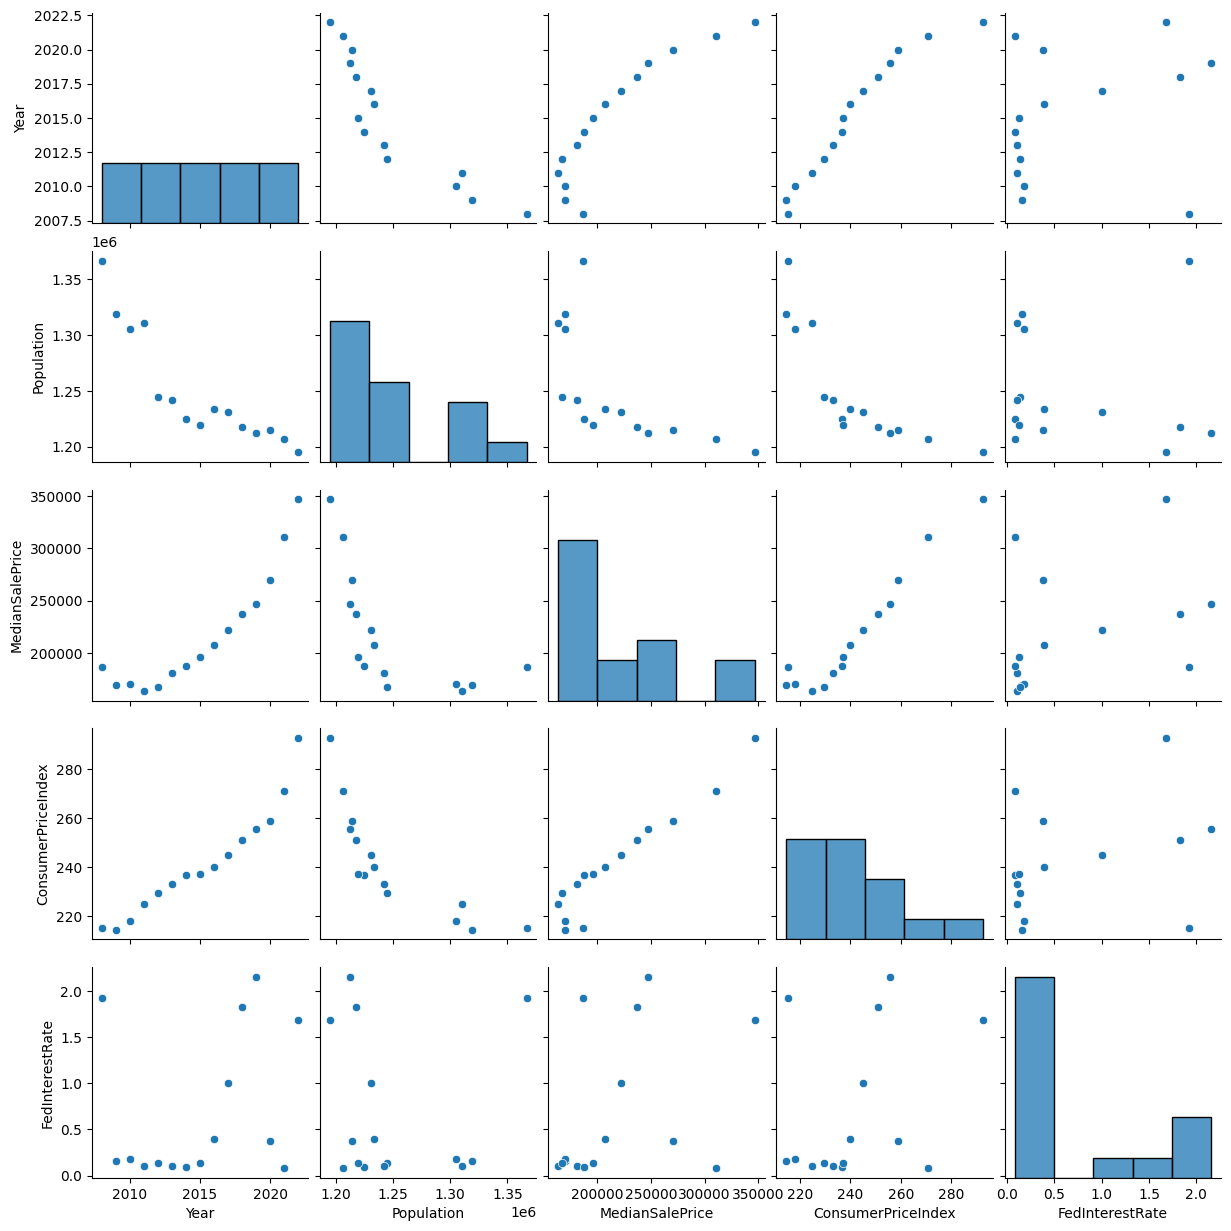

In [ ]:
# Block to create a SPLOM chart

# Import the libary
import seaborn as sns

# Prepare the Dataset
# Take the columns that we are interested
splom_df = df[['Year','Population','MedianSalePrice','ConsumerPriceIndex','FedInterestRate']]

# Calculate the mean value of all the city by different years
splom_df = splom_df.groupby('Year').mean()

# Reset the 'Year' from index to a column
splom_df =splom_df.reset_index()

# Draw the SPLOM
sns.pairplot(splom_df)

# Save the plot into a png file
plt.savefig("SPLOM.png", dpi=300, bbox_inches="tight")

**Chart Summary:**
*   Clear Positive relationship between year and CPI
*   Clear Positive relationship between year and Median Sale Price
*   Fair Negative relationship between year and population
*   Clear positive relationship between Median Sale Price and CPI
*   Fair Negative relationship between Median Sale Price and Population
*   Ambiguous relationship between CPI and Federal Interest Rate
*   No clear relationship between Fed Interest Rate and Median Sales Price
*   No clear relationship between Fed Interest Rate and Population





**Correlation Analysis** <br>
In order to find out what are the strongest contributors to the home price chanegs, we can analyze the correlation between home pirce and the other three factors.

 - We can calculate the Spearman Correlation score between housing price, population, CPI and inflation for all the cities
 - Save the data into a new DataFrame
 - calcualte the mean across all the cities
 - Take the abs
 - Check which factor has highest correlation score

  A high correlation coefficient suggests a strong relationship, but correlation does not imply causation.
**In the report we should explain why Spearman Correlation is better than Pearson Correlation**

In [ ]:
# Correlation Analysis
from scipy.stats import spearmanr

# Define the column names for the correlation score data frame
cities_correlation_socre_column_names =['City', 'Home_vs_CPI', 'Home_vs_InterestRate', 'Home_vs_Population']

# Create a new Dataframe
cities_correlation_socre_df = pd.DataFrame(columns = cities_correlation_socre_column_names)

# Get the names for all cities
all_cities = df['City'].unique()

# Loop through all cities and calculate the correlation score
for city in all_cities:
  # Get the data for the city
  city_df = df[df['City']==city]

  # Check if the DataFrame has enough data
  if len(city_df) < 5:
    continue
  # Calculate the Spearman Correlation Score between home price and CPI
  cpi_correlation, _ = spearmanr(city_df['MedianSalePrice'], city_df['ConsumerPriceIndex'])

  # Calculate the Spearman Correlation Score between home price and Interest Rate
  interest_rate_correlation, _ = spearmanr(city_df['MedianSalePrice'], city_df['FedInterestRate'])

  # Calculate the Spearman Correlation Score between home price and Population
  population_correlation, _ = spearmanr(city_df['MedianSalePrice'], city_df['Population'])

  # Append the data into result DataFrame
  data_to_append = {
      'City': city,
      'Home_vs_CPI': cpi_correlation,
      'Home_vs_InterestRate': interest_rate_correlation,
      'Home_vs_Population': population_correlation
  }
  cities_correlation_socre_df = cities_correlation_socre_df.append(data_to_append, ignore_index=True)

# check the result DataFrame
cities_correlation_socre_df.head()

,City,Home_vs_CPI,Home_vs_InterestRate,Home_vs_Population
0,Akron,0.975000,0.196429,-0.146429
1,Albuquerque,0.750000,0.525000,0.735714
2,Amarillo,1.000000,0.345455,0.987879
3,Asheville,0.892857,0.400000,0.885714
4,Atlanta,0.942857,0.310714,0.939286


In [ ]:
# Calcualte the mean value of all the city

mean_correlation_score_df = cities_correlation_socre_df.mean()
mean_correlation_score_df

Home_vs_CPI             0.916153
Home_vs_InterestRate    0.289239
Home_vs_Population      0.689495
dtype: float64

**Conclusion**

*   The home price has strongest correlation to CPI
*   The home price is highly correlated to Population Migration
*   Federal Interest rate is least correlated to the Home price
*   Note: Correlation is not causation. High correlation score does not mean this factor cause the home price change.



**HEAT MAP**

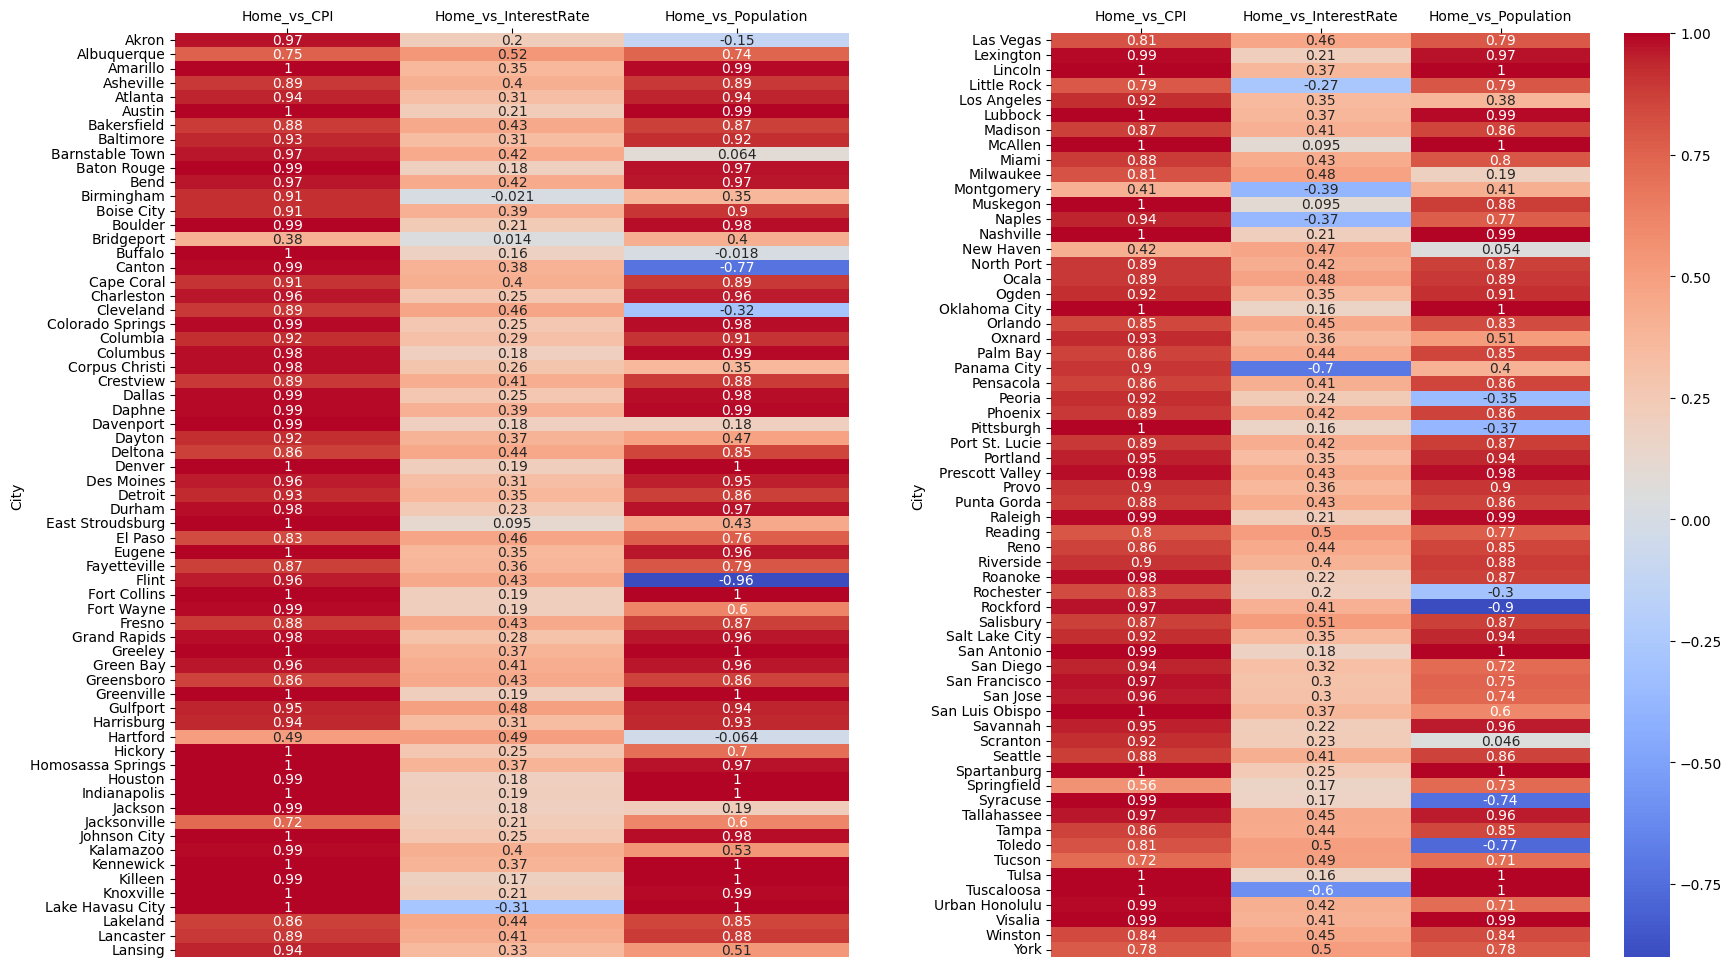

In [ ]:
# Create HeatMap DataFrame by Setting the City names as index
heatmap_df = cities_correlation_socre_df.set_index('City')

# Create a plot with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Create the first heatmap which covers the first 65 cities in the data
sns.heatmap(heatmap_df[:65], annot=True, cmap='coolwarm', xticklabels= True, yticklabels=True, ax=axes[0], cbar=False)

# Create the second heatmap which covers the rest of cities in the daata
sns.heatmap(heatmap_df[65:], annot=True, cmap='coolwarm', xticklabels= True, yticklabels=True, ax=axes[1])

# Move the label to the top
axes[0].xaxis.tick_top() # x axis on top
axes[0].xaxis.set_label_position('top')
axes[1].xaxis.tick_top() # x axis on top
axes[1].xaxis.set_label_position('top')

# Adjust the sapce between two plots to aviod text overlapping
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

### 4.2 How are inflation and interest rates related?

The impetus of this project is that we have been observing the rising dederal interest rate, but the home price in some cities did not decrease as expected. Some of the cities even seeing increasing home price under the significant rate rising. <br>

In our last section, we have found out the home price is strongly correlated to the CPI. Could this be the reason that home price did not decrease as fedual expected? <br>

It would be value to find out what is the relationship between CPI and interest rate. Potentially, It will help us understand the trend of the home price changes at the same time.


**Prepare the Data**

In [ ]:
# Reload the Raw dataset
interest_rate_url = 'https://raw.githubusercontent.com/songxincheng124/SIADS_Milestone1/main/FEDFUNDS.csv'
interest_rate_df_raw = pd.read_csv(interest_rate_url)

inflation_url = 'https://raw.githubusercontent.com/songxincheng124/SIADS_Milestone1/main/CPIAUCSL.csv'
inflation_df_raw = pd.read_csv(inflation_url)

# Merge the dataframe
interest_inflation_df = pd.merge(interest_rate_df_raw, inflation_df_raw, on='DATE', how='inner')
interest_inflation_df.head()


,DATE,FEDFUNDS,CPIAUCSL
0,1954-07-01,0.80,26.86
1,1954-08-01,1.22,26.85
2,1954-09-01,1.07,26.81
3,1954-10-01,0.85,26.72
4,1954-11-01,0.83,26.78


**Line Chart**

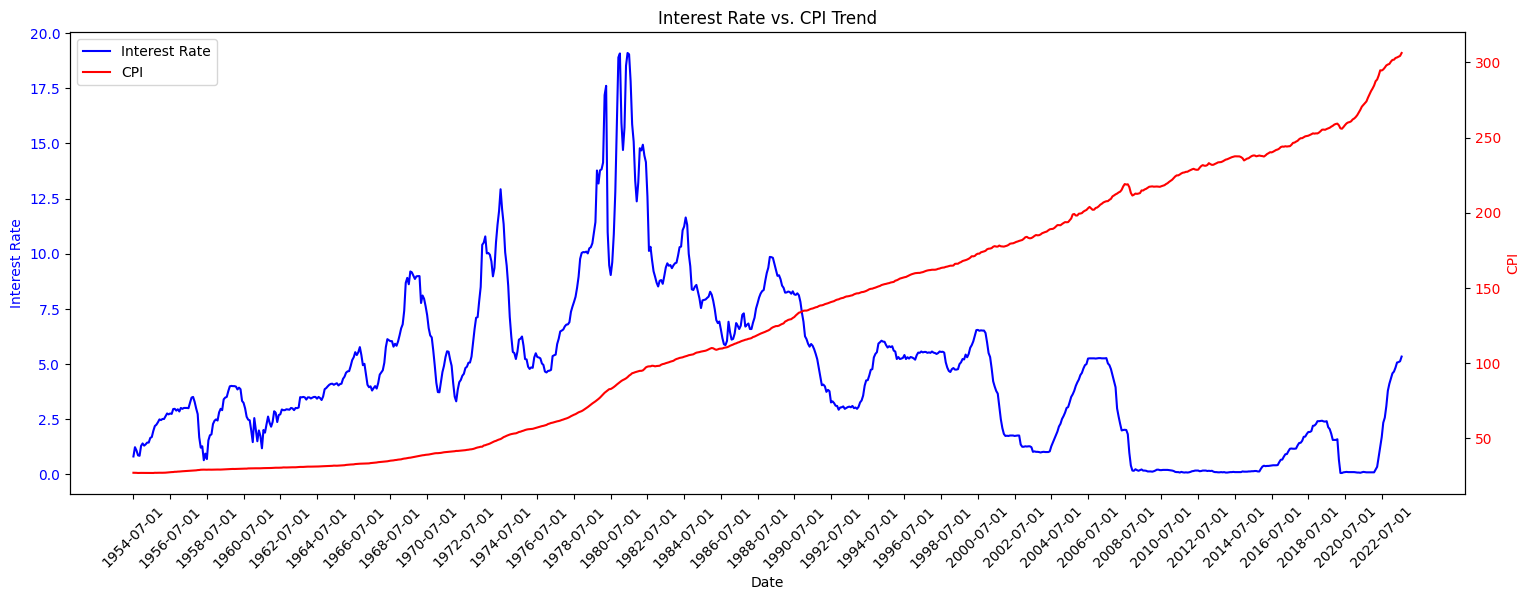

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot Interest Rate on the primary y-axis (left)
ax1.plot(interest_inflation_df['DATE'], interest_inflation_df['FEDFUNDS'], label='Interest Rate', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(interest_inflation_df.index[::24], interest_inflation_df['DATE'][::24], rotation=45)

# Create a secondary y-axis (right) for CPI
ax2 = ax1.twinx()
ax2.plot(interest_inflation_df['DATE'], interest_inflation_df['CPIAUCSL'], label='CPI', color='red')
ax2.set_ylabel('CPI', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add labels and title
plt.title('Interest Rate vs. CPI Trend')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels)

# Show the plot
plt.show()

**Correlation Analysis**

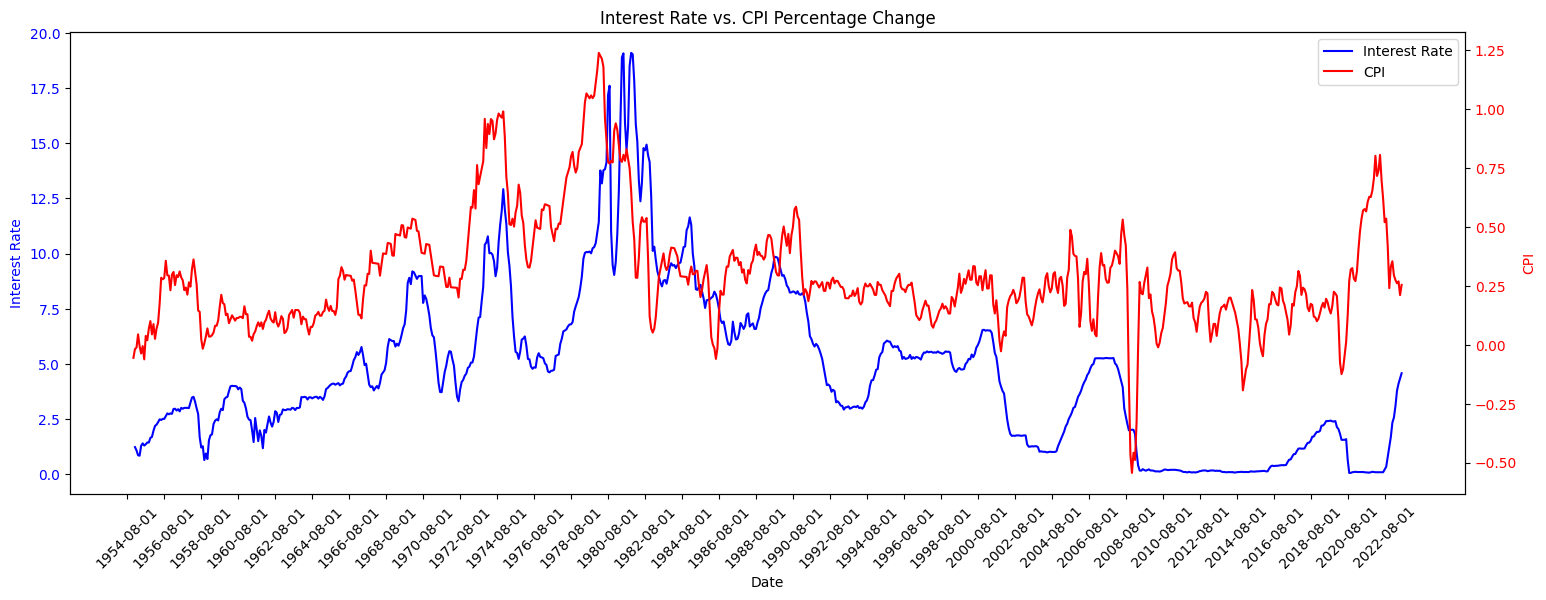

In [ ]:
# Get the CPI percentage change
interest_inflation_df['CPI_pct_change'] = interest_inflation_df['CPIAUCSL'].pct_change() * 100
interest_inflation_df = interest_inflation_df.dropna()
interest_inflation_df['CPI_pct_change_smoothed'] = interest_inflation_df['CPI_pct_change'].rolling(window=6).mean()
interest_inflation_df['FEDFUNDS'] = interest_inflation_df['FEDFUNDS'].shift(6)
# Redraw the same graph
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot Interest Rate on the primary y-axis (left)
ax1.plot(interest_inflation_df['DATE'], interest_inflation_df['FEDFUNDS'], label='Interest Rate', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(interest_inflation_df.index[::24], interest_inflation_df['DATE'][::24], rotation=45)

# Create a secondary y-axis (right) for CPI
ax2 = ax1.twinx()
ax2.plot(interest_inflation_df['DATE'], interest_inflation_df['CPI_pct_change_smoothed'], label='CPI', color='red')
ax2.set_ylabel('CPI', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add labels and title
plt.title('Interest Rate vs. CPI Percentage Change')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels)

# Show the plot
plt.show()

### 4.3 What are the geographical variances between home price changes?

**4.3.1 Introduction**

The aim of this analysis is to discern the geographical variances in home price changes across different cities in the U.S. By employing a mix of data visualization and quantitative measures, we endeavored to provide a comprehensive picture of price evolution from both a macro and micro perspective.

**4.3.2 Methodology**

Our approach entailed three key steps:

* Visualization of Overall Price Changes: To capture long-term trends and compare the trajectory of home prices across cities.

* Visualization of Year-over-Year (YOY) Price Changes: To identify short-term fluctuations and understand annual dynamics.

* Feature Changes Analysis: To pinpoint cities showcasing notable patterns, be it in terms of extreme growth or volatility.


**4.3.3 Data Visualization**

**4.3.3.1 Overall Price Change**

In [ ]:
import plotly.graph_objects as go

# Keep only necessary columns and rename them to match df
cities_df = lat_long_df[['city', 'state_id', 'lat', 'lng']]
cities_df.rename(columns={"city": "City", "state_id": "State", "lat": "Latitude", "lng": "Longitude"}, inplace=True)

# Merge dataframes
merged_df = pd.merge(df, cities_df, on=['City', 'State'], how='left')

years = sorted(merged_df['Year'].unique())
traces = []

min_price = merged_df['MedianSalePrice'].min()
max_price = merged_df['MedianSalePrice'].max()

for year in years:
    year_data = merged_df[merged_df['Year'] == year]
    trace = go.Scattergeo(
        lon=year_data['Longitude'],
        lat=year_data['Latitude'],
        text=year_data['City'] + '<br>Median Sale Price: $' + year_data['MedianSalePrice'].astype(str),
        mode='markers',
        marker=dict(
            size=30,
            opacity=0.6,
            color=year_data['MedianSalePrice'],
            colorscale='Viridis',
            colorbar=dict(title="Median Sale Price"),
            cmin=min_price,
            cmax=max_price,
            line=dict(width=1, color='rgba(102, 102, 102)')
        ),
        name=str(year)
    )
    traces.append(trace)

steps = []
for i, year in enumerate(years):
    step = {
        'args': [
            [f"{year}"],
            {
                'frame': {'duration': 500, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
                'visible': True  # Ensure visibility is true
            }
        ],
        'label': str(year),
        'method': 'animate'
    }
    steps.append(step)

sliders = [dict(
    active=0,
    yanchor="top",
    xanchor="left",
    currentvalue={
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    pad={"b": 10, "t": 50},
    steps=steps
)]

layout = go.Layout(
    title_text="Median Sale Price by City Over Years",
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor='white',
        subunitcolor='gray',
        countrycolor='gray',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showsubunits=True,
    ),
    sliders=sliders,
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "transition": {"duration": 300}}],
                     ),
                 dict(label="Pause",
                      method="animate",
                      args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
                     )]
    )],
    width=1000,   # Adjust as per your requirement
    height=600,   # Adjust as per your requirement
)

frames = [go.Frame(data=[trace], name=str(year)) for year, trace in zip(years, traces)]

fig_saleprice = go.Figure(data=[traces[0]], layout=layout, frames=frames)  # Initially, only display the first year
fig_saleprice.show()


In [ ]:
# Group by City and State to calculate the average price
average_price_df = merged_df.groupby(['City', 'State', 'Latitude', 'Longitude'])['MedianSalePrice'].mean().reset_index()

# Create the map without the slider
trace_avg = go.Scattergeo(
    lon=average_price_df['Longitude'],
    lat=average_price_df['Latitude'],
    text=average_price_df['City'] + ', ' + average_price_df['State'] + '<br>Average Sale Price: $' + average_price_df['MedianSalePrice'].round(2).astype(str),
    mode='markers',
    marker=dict(
        size=30,
        opacity=0.6,
        color=average_price_df['MedianSalePrice'],
        colorscale='Viridis',
        colorbar=dict(title="Average Sale Price"),
        cmin=min_price,
        cmax=max_price,
        line=dict(width=1, color='rgba(102, 102, 102)')
    )
)

layout_avg = go.Layout(
    title_text="Average Home Price by City",
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor='white',
        subunitcolor='gray',
        countrycolor='gray',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showsubunits=True,
    ),
    width=1000,   # Adjust as per your requirement
    height=600    # Adjust as per your requirement
)

fig_avg = go.Figure(data=[trace_avg], layout=layout_avg)
fig_avg.show()

In [ ]:
# Group by City and State to calculate the average price
average_price_df = merged_df.groupby(['City', 'State', 'Latitude', 'Longitude'])['MedianSalePrice'].mean().reset_index()

# Create the map without the slider
trace_avg = go.Scattergeo(
    lon=average_price_df['Longitude'],
    lat=average_price_df['Latitude'],
    text=average_price_df['City'] + ', ' + average_price_df['State'] + '<br>Average Sale Price: $' + average_price_df['MedianSalePrice'].round(2).astype(str),
    mode='markers',
    marker=dict(
        size=30,
        opacity=0.6,
        color=average_price_df['MedianSalePrice'],
        colorscale='Viridis',
        colorbar=dict(title="Average Sale Price"),
        cmin=average_price_df['MedianSalePrice'].min(),
        cmax=average_price_df['MedianSalePrice'].max(),
        line=dict(width=1, color='rgba(102, 102, 102)')
    ),
    showlegend=False
)

layout_avg = go.Layout(
    title_text="Average Home Price by City",
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor='white',
        subunitcolor='gray',
        countrycolor='gray',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showsubunits=True,
    ),
    width=1000,   # Adjust as per your requirement
    height=600    # Adjust as per your requirement
)

fig_avg = go.Figure(data=[trace_avg], layout=layout_avg)
fig_avg.show()

The visualization clearly shows that home prices have generally increased across most cities. Moreover, the West coast stands out with the highest home prices, followed closely by the East coast, while central regions remain relatively lower.

**4.3.3.2 Year-over-Year Price Change**

In [ ]:

merged_df['PriceChange'] = merged_df.groupby('City')['MedianSalePrice'].pct_change() * 100

traces = []

min_price = merged_df['PriceChange'].min()
max_price = merged_df['PriceChange'].max()

for year in years:
    year_data = merged_df[merged_df['Year'] == year]
    trace = go.Scattergeo(
        lon=year_data['Longitude'],
        lat=year_data['Latitude'],
        text=year_data['City'] + '<br>Median Sale Price Change %: ' + year_data['PriceChange'].astype(str),
        mode='markers',
        marker=dict(
            size=30,
            opacity=0.6,
            color=year_data['PriceChange'],
            colorscale='Viridis',
            colorbar=dict(title="Median Sale Price Change %"),
            cmin=min_price,
            cmax=max_price,
            line=dict(width=1, color='rgba(102, 102, 102)')
        ),
        name=str(year)
    )
    traces.append(trace)

steps = []
for i, year in enumerate(years):
    step = {
        'args': [
            [f"{year}"],
            {
                'frame': {'duration': 500, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
                'visible': True  # Ensure visibility is true
            }
        ],
        'label': str(year),
        'method': 'animate'
    }
    steps.append(step)

sliders = [dict(
    active=0,
    yanchor="top",
    xanchor="left",
    currentvalue={
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    pad={"b": 10, "t": 50},
    steps=steps
)]

layout = go.Layout(
    title_text="Median Sale Price Change by City Over Years",
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor='white',
        subunitcolor='gray',
        countrycolor='gray',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showsubunits=True,
    ),
    sliders=sliders,
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "transition": {"duration": 300}}],
                     ),
                 dict(label="Pause",
                      method="animate",
                      args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
                     )]
    )],
    width=1000,   # Adjust as per your requirement
    height=600,   # Adjust as per your requirement
)

frames = [go.Frame(data=[trace], name=str(year)) for year, trace in zip(years, traces)]

fig_saleprice = go.Figure(data=[traces[0]], layout=layout, frames=frames)  # Initially, only display the first year
fig_saleprice.show()


In [ ]:
# Calculate average price change for each city across the years
average_price_change_df = merged_df.groupby(['City', 'State', 'Latitude', 'Longitude'])['PriceChange'].mean().reset_index()

# Set up the trace for average price change
trace_avg_change = go.Scattergeo(
    lon=average_price_change_df['Longitude'],
    lat=average_price_change_df['Latitude'],
    text=average_price_change_df['City'] + ', ' + average_price_change_df['State'] + '<br>Average Sale Price Change %: ' + average_price_change_df['PriceChange'].round(2).astype(str),
    mode='markers',
    marker=dict(
        size=30,
        opacity=0.6,
        color=average_price_change_df['PriceChange'],
        colorscale='Viridis',
        colorbar=dict(title="Average Sale Price Change %"),
        cmin=average_price_change_df['PriceChange'].min(),
        cmax=average_price_change_df['PriceChange'].max(),
        line=dict(width=1, color='rgba(102, 102, 102)')
    ),
    # showscale=True,
    showlegend=False
)

layout_avg_change = go.Layout(
    title_text="Average Sale Price Change by City",
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor='white',
        subunitcolor='gray',
        countrycolor='gray',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showsubunits=True,
    ),
    width=1000,  # Adjust as per your requirement
    height=600   # Adjust as per your requirement
)

fig_avg_price_change = go.Figure(data=[trace_avg_change], layout=layout_avg_change)
fig_avg_price_change.show()


The YOY visualization clearly indicates that home prices are rising across the US, with some areas increasing faster than others. Notably, between 2008 and 2022, west coast cities and Florida experienced more pronounced fluctuations in some years.

**4.3.3.3 Feature Changes Analysis**

To deepen our insights, we extracted cities that demonstrated remarkable price changes or volatility:

In [ ]:
# Set combined keys for city and state
merged_df['CityState'] = merged_df['City'] + ', ' + merged_df['State']

# Determine the starting year for each city-state combo
start_years = merged_df.groupby('CityState')['Year'].min()

# Fetch the prices for the starting year for each city-state combo
start_prices = merged_df.set_index(['CityState', 'Year']).loc[
    [(city_state, year) for city_state, year in zip(start_years.index, start_years.values)]
]['MedianSalePrice']

# Reset index for start_prices to match the structure of end_prices
start_prices = start_prices.reset_index(level='Year', drop=True)

# Fetch the prices for 2022
end_prices = merged_df[merged_df['Year'] == 2022].set_index('CityState')['MedianSalePrice']

# Calculate the price increase
price_increase = ((end_prices - start_prices) / start_prices) * 100

# Filter out cities with only one year of data
city_data_counts = merged_df['CityState'].value_counts()
city_states_with_multiple_years = city_data_counts[city_data_counts > 1].index

price_increase = price_increase[price_increase.index.isin(city_states_with_multiple_years)]


# Top 5 city-state combos in increase
top_5_increase = price_increase.nlargest(5)

# Bottom 5 city-state combos in increase
bottom_5_increase = price_increase.nsmallest(5)

# Calculate yearly percentage price changes, then calculate volatility (std dev) for each city-state combo
city_price_changes = merged_df.groupby('CityState')['MedianSalePrice'].pct_change()
volatility = city_price_changes.groupby(merged_df['CityState']).std()

# Top and bottom 5 city-state combos in volatility
top_5_volatility = volatility.nlargest(5)
bottom_5_volatility = volatility.nsmallest(5)

# Combining the series
max_len = max(len(top_5_increase), len(top_5_volatility), len(bottom_5_increase), len(bottom_5_volatility))

# Function to pad series with NaN to make them all the same length
def pad_series(ser, length=max_len):
    return ser.append(pd.Series([None] * (length - len(ser))))

top_5_increase = pad_series(top_5_increase)
top_5_volatility = pad_series(top_5_volatility)
bottom_5_increase = pad_series(bottom_5_increase)
bottom_5_volatility = pad_series(bottom_5_volatility)

# Creating a DataFrame to hold the results
results_df = pd.DataFrame({
    "Top 5 Cities by Increase": top_5_increase.index,
    "Increase (%)": top_5_increase.values,
    "Top 5 Volatile Cities": top_5_volatility.index,
    "Volatility (Std Dev)": top_5_volatility.values,
    "Bottom 5 Cities by Increase": bottom_5_increase.index,
    "Increase (%) buttom": bottom_5_increase.values,
    "Bottom 5 Volatile Cities": bottom_5_volatility.index,
    "Stability (Std Dev)": bottom_5_volatility.values
})

results_df

,Top 5 Cities by Increase,Increase (%),Top 5 Volatile Cities,Volatility (Std Dev),Bottom 5 Cities by Increase,Increase (%) buttom,Bottom 5 Volatile Cities,Stability (Std Dev)
0,"Bend, OR",194.215303,"Las Vegas, NV",0.150638,"Shreveport, LA",1.734976,"Charlottesville, VA",0.013571
1,"Homosassa Springs, FL",194.018898,"Phoenix, AZ",0.141068,"New Orleans, LA",3.957779,"Davenport, IL",0.018688
2,"Austin, TX",179.948459,"Reno, NV",0.134428,"Waco, TX",6.795674,"Macon, GA",0.020568
3,"Nashville, TN",172.471899,"Boise City, ID",0.133641,"Peoria, IL",19.443816,"Pittsburgh, PA",0.024794
4,"Dallas, TX",171.696550,"Orlando, FL",0.129902,"Charlottesville, VA",22.634985,"Oklahoma City, OK",0.026636


**4.3.4 Conclusion**

Home prices across U.S. cities reflect significant geographical variances. While the overall trend points to an increase in home prices, cities such as Bend, OR and Homosassa Springs, FL have experienced striking surges, with increases of approximately 194.2% and 194.0% respectively. In contrast, cities like Shreveport, LA and New Orleans, LA exhibited relatively minimal growth, with the former seeing only a 1.73% rise.

Assessing volatility provides insights into market fluctuations. Las Vegas, NV, and Phoenix, AZ lead in this metric, indicating notable price variability over time. Conversely, Charlottesville, VA, and Davenport, IL have maintained the most stability in the real estate market, showing the least amount of volatility. Such variations emphasize the intricate nature of the real estate market where geography significantly influences price dynamics and potential market stability, crucial for investors to consider.

### 4.4 Are certain regional home markets more or less influenced by population?

**4.4.1 Introduction**

In the context of home prices, inflation and interest rates often serve as broad economic parameters affecting all cities. Yet, population dynamics, being city-specific, could offer a distinctive lens to understand variances in home price movements. This analysis investigates the relationship between population changes and price fluctuations across U.S. cities.


**4.4.2 Methodology**

Our methodology comprises two main stages:

- **Analysis of Population Change Over Time**: Understand the trajectory of population growth or decline for each city.
- **Correlation Analysis**: Determine the nature and strength of the relationship between population change and home price change.

**4.4.3.1 Analysis of Population Change**

First, we chart the evolution of population across cities over time:

In [ ]:
traces = []

min_population = merged_df['Population'].min()
max_population = merged_df['Population'].max()

for year in years:
    year_data = merged_df[merged_df['Year'] == year]
    trace = go.Scattergeo(
        lon=year_data['Longitude'],
        lat=year_data['Latitude'],
        text=year_data['City'] + '<br>Population: ' + year_data['Population'].astype(str),
        mode='markers',
        marker=dict(
            size=30,
            opacity=0.6,
            color=year_data['Population'],
            colorscale='Viridis',
            colorbar=dict(title="Population"),
            cmin=min_population,
            cmax=max_population,
            line=dict(width=1, color='rgba(102, 102, 102)')
        ),
        name=str(year)
    )
    traces.append(trace)

steps = []
for i, year in enumerate(years):
    step = {
        'args': [
            [f"{year}"],
            {
                'frame': {'duration': 500, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
                'visible': True  # Ensure visibility is true
            }
        ],
        'label': str(year),
        'method': 'animate'
    }
    steps.append(step)

sliders = [dict(
    active=0,
    yanchor="top",
    xanchor="left",
    currentvalue={
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    pad={"b": 10, "t": 50},
    steps=steps
)]

layout = go.Layout(
    title_text="Population by City Over Years",
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor='white',
        subunitcolor='gray',
        countrycolor='gray',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showsubunits=True,
    ),
    sliders=sliders,
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "transition": {"duration": 300}}],
                     ),
                 dict(label="Pause",
                      method="animate",
                      args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
                     )]
    )],
    width=1000,   # Adjust as per your requirement
    height=600,   # Adjust as per your requirement
)

frames = [go.Frame(data=[trace], name=str(year)) for year, trace in zip(years, traces)]

fig_population = go.Figure(data=[traces[0]], layout=layout, frames=frames)  # Initially, only display the first year
fig_population.show()


In [ ]:
# Calculate Year-over-Year Population Change
merged_df['PopulationChangeYOY'] = merged_df.groupby('CityState')['Population'].pct_change().fillna(0) * 100

traces = []

# Setting up the color scale for population change
min_population_change = merged_df['PopulationChangeYOY'].min()
max_population_change = merged_df['PopulationChangeYOY'].max()

for year in years:
    year_data = merged_df[merged_df['Year'] == year]
    trace = go.Scattergeo(
        lon=year_data['Longitude'],
        lat=year_data['Latitude'],
        text=year_data['City'] + '<br>Population Change: ' + year_data['PopulationChangeYOY'].round(2).astype(str) + '%',
        mode='markers',
        marker=dict(
            size=30,
            opacity=0.6,
            color=year_data['PopulationChangeYOY'],
            colorscale='Viridis',
            colorbar=dict(title="Population Change (%)"),
            cmin=min_population_change,
            cmax=max_population_change,
            line=dict(width=1, color='rgba(102, 102, 102)')
        ),
        name=str(year)
    )
    traces.append(trace)

steps = []
for i, year in enumerate(years):
    step = {
        'args': [
            [f"{year}"],
            {
                'frame': {'duration': 500, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
                'visible': True
            }
        ],
        'label': str(year),
        'method': 'animate'
    }
    steps.append(step)

sliders = [dict(
    active=0,
    yanchor="top",
    xanchor="left",
    currentvalue={
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    pad={"b": 10, "t": 50},
    steps=steps
)]

layout = go.Layout(
    title_text="Year-over-Year Population Change by City Over Years",
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor='white',
        subunitcolor='gray',
        countrycolor='gray',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showsubunits=True,
    ),
    sliders=sliders,
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "transition": {"duration": 300}}],
                     ),
                 dict(label="Pause",
                      method="animate",
                      args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
                     )]
    )],
    width=1000,   # Adjust as per your requirement
    height=600,   # Adjust as per your requirement
)

frames = [go.Frame(data=[trace], name=str(year)) for year, trace in zip(years, traces)]
fig_population_change = go.Figure(data=[traces[0]], layout=layout, frames=frames)
fig_population_change.show()


From the visualizations, it's clear that between 2008 and 2022, the population in most US cities remained relatively steady, typically seeing annual changes of less than 5%. Notably, there were significant spikes in 2010, with increases and decreases reaching as high as 30% and as low as -20%, respectively. Upon further investigation, we found that these anomalies resulted from data interpolation between the 2000 and 2010 census years. To ensure a more accurate analysis, we've decided to focus on data from 2010 onwards.

**4.4.3.2 Correlation Analysis**

To investigate if there's a significant relationship between the population and price changes, a correlation analysis is performed:

In [ ]:
merged_df = merged_df[merged_df['Year'] >= 2010]

In [ ]:
# 1. Calculate the YOY percentage change for home prices and population
merged_df['PriceChange'] = merged_df.groupby('CityState')['MedianSalePrice'].pct_change() * 100
merged_df['PopulationChange'] = merged_df.groupby('CityState')['Population'].pct_change() * 100

# Remove NaN values (first row of each group will have NaN due to pct_change)
analysis_df = merged_df.dropna(subset=['PriceChange', 'PopulationChange'])


In [ ]:

# Assuming 'analysis_df' from the previous code block

years = sorted(analysis_df['Year'].unique())
traces = []

for year in years:
    year_data = analysis_df[analysis_df['Year'] == year]
    trace = go.Scatter(
        x=year_data['PopulationChange'],
        y=year_data['PriceChange'],
        text=year_data['CityState'],
        mode='markers',
        marker=dict(
            size=10,
            opacity=0.6,
            color='blue'
        ),
        name=str(year)
    )
    traces.append(trace)

steps = []
for i, year in enumerate(years):
    step = {
        'args': [
            [f"{year}"],
            {
                'frame': {'duration': 500, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
                'visible': True  # Ensure visibility is true
            }
        ],
        'label': str(year),
        'method': 'animate'
    }
    steps.append(step)

sliders = [dict(
    active=0,
    yanchor="top",
    xanchor="left",
    currentvalue={
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    pad={"b": 10, "t": 50},
    steps=steps
)]

layout = go.Layout(
    title_text="YOY Population Change vs. YOY Home Price Change",
    xaxis=dict(
        title="YOY Population Change (%)",
        range=[analysis_df['PopulationChange'].min() * 1.1, analysis_df['PopulationChange'].max() * 1.1]  # 10% padding
    ),
    yaxis=dict(
        title="YOY Home Price Change (%)",
        range=[analysis_df['PriceChange'].min() * 1.1, analysis_df['PriceChange'].max() * 1.1]  # 10% padding
    ),
    sliders=sliders,
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "transition": {"duration": 300}}],
                     ),
                 dict(label="Pause",
                      method="animate",
                      args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
                     )]
    )],
    width=1000,   # Adjust as per your requirement
    height=600,   # Adjust as per your requirement
)

frames = [go.Frame(data=[trace], name=str(year)) for year, trace in zip(years, traces)]

fig = go.Figure(data=[traces[0]], layout=layout, frames=frames)  # Initially, only display the first year
fig.show()


In [ ]:
# Calculate average YOY Population Change and YOY Home Price Change for each year
average_changes = analysis_df.groupby('Year').agg({
    'PopulationChange': 'mean',
    'PriceChange': 'mean'
}).reset_index()

traces = []

for idx, row in average_changes.iterrows():
    trace = go.Scatter(
        x=[row['PopulationChange']],
        y=[row['PriceChange']],
        text=str(int(row['Year'])),  # Convert year to integer and then to string for display
        mode='markers+text',
        marker=dict(
            size=20,
            opacity=0.8,
            color='red'
        ),
        name=str(int(row['Year']))  # Convert year to integer and then to string for display
    )
    traces.append(trace)

layout = go.Layout(
    title_text="Average YOY Population Change vs. Average YOY Home Price Change",
    xaxis=dict(
        title="YOY Population Change (%)",
        range=[average_changes['PopulationChange'].min() * 1.1, average_changes['PopulationChange'].max() * 1.1]  # 10% padding
    ),
    yaxis=dict(
        title="YOY Home Price Change (%)",
        range=[average_changes['PriceChange'].min() * 1.1, average_changes['PriceChange'].max() * 1.1]  # 10% padding
    ),
    width=1000,   # Adjust as per your requirement
    height=600,   # Adjust as per your requirement
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
# Drop rows where MedianSalePrice or Population is NaN
filtered_df = merged_df.dropna(subset=['MedianSalePrice', 'Population'])

# Filter out cities with only one year of data
city_counts = filtered_df['CityState'].value_counts()
multi_year_cities = city_counts[city_counts > 1].index
filtered_df = filtered_df[filtered_df['CityState'].isin(multi_year_cities)]

# Calculate the correlation coefficient for each city
correlation_df = filtered_df.groupby('CityState').apply(lambda x: x['MedianSalePrice'].corr(x['Population'])).reset_index()
correlation_df.columns = ['CityState', 'Correlation']

# # Display correlation coefficients
# print(correlation_df.sort_values(by='Correlation', ascending=False))

# If you want the overall correlation across all cities:
overall_corr = filtered_df['MedianSalePrice'].corr(filtered_df['Population'])
print(f"\nOverall Correlation: {overall_corr}")


Overall Correlation: 0.29598677519215505


From the data, there's a slight positive correlation of 0.29 between population growth and home price increase. This means that while some cities with growing populations see higher home prices, the relationship isn't very strong. Other factors likely play a significant role in home price changes.

### 4.5 How has net migration affected home price?

Ratio: 2010 - 2011 how much population has changed in percentage; percentage change in home price. devide two numbers; line chart

Steps:
 - Calcualte the population percentage in change by different city
 - Calcualte the Home price percentage in change by different city
 - Calculate the correlation score
 - list the correlation score
 - Find out which city is most correlated. Which city is least correlated


cost per person: median home price / population; plot over years & cities

In [ ]:
# Create a new Dataframe with only Home price and the Population columns
home_population_df = df[['City',	'Year',	'Population',	'MedianSalePrice']]

CIP_df = pd.DataFrame(columns=['City',	'Year',	'Population',	'MedianSalePrice', 'Populcation_CIP', 'MedianSalePrice_CIP'])

all_cities = df['City'].unique()
# Traverse each city to calculate the percentage change
for city in all_cities:
  city_df = home_population_df[home_population_df['City']==city]
  if len(city_df) >=5:
    city_df['Populcation_CIP'] = home_population_df[home_population_df['City']==city]['Population'].pct_change() * 100
    city_df['MedianSalePrice_CIP'] = home_population_df[home_population_df['City']==city]['MedianSalePrice'].pct_change() * 100
    CIP_df = pd.concat([CIP_df, city_df], ignore_index=True)

CIP_df = CIP_df.dropna()
CIP_df.head()


,City,Year,Population,MedianSalePrice,Populcation_CIP,MedianSalePrice_CIP
1,Akron,2009,702376.0,115054.326923,0.117454,-5.679871
2,Akron,2010,703056.0,122944.882353,0.096814,6.858113
3,Akron,2011,703262.0,123724.905660,0.029301,0.634450
4,Akron,2012,702224.0,122315.153846,-0.147598,-1.139424
5,Akron,2013,703778.0,126247.365385,0.221297,3.214820


In [ ]:
 # Calculate the Spearman Correlation score for different cities
all_city_names = CIP_df['City'].unique()

correlation_df = pd.DataFrame(columns=['City', 'CIP Correlation Score', 'Value Correlation Score'])
#
for city in all_city_names:
  city_df = CIP_df[CIP_df['City'] == city]
  cip_score, _ = spearmanr(city_df['MedianSalePrice_CIP'], city_df['Populcation_CIP'])
  value_score, _ = spearmanr(city_df['MedianSalePrice'], city_df['Population'])
  data_to_append = {
      'City': city,
      'CIP Correlation Score': cip_score,
      'Value Correlation Score': value_score
  }
  correlation_df = correlation_df.append(data_to_append, ignore_index=True)

correlation_df.sort_values(by='CIP Correlation Score', ascending= False)


,City,CIP Correlation Score,Value Correlation Score
87,Panama City,0.800000,1.000000
51,Homosassa Springs,0.793939,1.000000
114,Spartanburg,0.761905,1.000000
8,Barnstable Town,0.747253,0.131868
122,Tuscaloosa,0.600000,1.000000
...,...,...,...
61,Lake Havasu City,-0.700000,1.000000
45,Greensboro,-0.727473,0.916484
74,Milwaukee,-0.731868,0.191209
1,Albuquerque,-0.771429,0.832967


In [ ]:
# The block to calculate the Cost per Person
cost_per_person_df = df[['City',	'Year',	'Population',	'MedianSalePrice']]
cost_per_person_df['Cost Per Person'] = cost_per_person_df['MedianSalePrice'] / cost_per_person_df['Population']

change_in_percent = pd.DataFrame(columns=['City',	'Year',	'Population',	'MedianSalePrice', 'CPP_CIP'])

# Traverse each city to calculate the percentage change
for city in all_cities:
  city_df = cost_per_person_df[cost_per_person_df['City']==city]
  if len(city_df) >=5:
    city_df['CPP_CIP'] = cost_per_person_df[cost_per_person_df['City']==city]['Cost Per Person'].pct_change() * 100
    change_in_percent = pd.concat([change_in_percent, city_df], ignore_index=True)

change_in_percent = change_in_percent.dropna()
CPP_change_rate = change_in_percent.groupby('City').mean()['CPP_CIP']
CPP_change_rate.sort_values()

City
Springfield          0.339601
Rochester            0.888977
Peoria               0.999737
Crestview            1.186419
Bridgeport           1.390371
                      ...    
Naples              10.927463
East Stroudsburg    11.424135
Panama City         12.366134
Lake Havasu City    12.746316
Jacksonville        18.579049
Name: CPP_CIP, Length: 127, dtype: float64